<h1>Importing Packages</h1>

In [406]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

##### For Preprocessing #####
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

##### For Building the Model #####
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline

<h1>1.) Loading the Dataset </h1>

In [407]:
# Load the dataset
df = pd.read_csv("Advertising.csv")
#cleaning the dataset by removing unneeded columns
df = df.drop('Unnamed: 0', axis=1)
df


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


<h1>2.) Standardizing the Dataset</h1>

In [408]:
#Here we use sklearn's preprocessing.scale function to standardize our dataset
df_standard = preprocessing.scale(df)
df_standard = pd.DataFrame(df_standard, columns = df.columns)
df_standard


,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


<h1>3.) Adding the extra column of all ones</h1>

In [409]:
df_standard.insert(0, 'bias', 1)
df_standard

,bias,TV,Radio,Newspaper,Sales
0,1,0.969852,0.981522,1.778945,1.552053
1,1,-1.197376,1.082808,0.669579,-0.696046
2,1,-1.516155,1.528463,1.783549,-0.907406
3,1,0.052050,1.217855,1.286405,0.860330
4,1,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...,...
195,1,-1.270941,-1.321031,-0.771217,-1.234053
196,1,-0.617035,-1.240003,-1.033598,-0.830548
197,1,0.349810,-0.942899,-1.111852,-0.234898
198,1,1.594565,1.265121,1.640850,2.205347


<h1>4.) Splitting the dataset for testing and training </h1>

In [410]:
#splitting the dataset
x = df_standard.drop("Sales", axis = 1)
y = df_standard["Sales"]
print(x)
print(y)

     bias        TV     Radio  Newspaper
0       1  0.969852  0.981522   1.778945
1       1 -1.197376  1.082808   0.669579
2       1 -1.516155  1.528463   1.783549
3       1  0.052050  1.217855   1.286405
4       1  0.394182 -0.841614   1.281802
..    ...       ...       ...        ...
195     1 -1.270941 -1.321031  -0.771217
196     1 -0.617035 -1.240003  -1.033598
197     1  0.349810 -0.942899  -1.111852
198     1  1.594565  1.265121   1.640850
199     1  0.993206 -0.990165  -1.005979

[200 rows x 4 columns]
0      1.552053
1     -0.696046
2     -0.907406
3      0.860330
4     -0.215683
         ...   
195   -1.234053
196   -0.830548
197   -0.234898
198    2.205347
199   -0.119610
Name: Sales, Length: 200, dtype: float64


In [411]:
#We will use .75 and .25 because .85 and .25 does not work
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, test_size = 0.25)

<h1>Required Functions for item 5.) Fitting the Model on the Training Set</h1>
<h2>Function: initializing_weights</h2>

In [412]:
def initializing_weights(random_opt):
    init_w = np.zeros(4)
    if random_opt == True:
        np.random.seed(7)
        init_w = np.random.rand(4)
    return init_w

initializing_weights(True)



array([0.07630829, 0.77991879, 0.43840923, 0.72346518])

<h2> Function: predict</h2>  

In [413]:
def predict(xp, p_weights):
    return np.dot(xp, p_weights)

y_hat_train = predict(x_train, initializing_weights(True))

df_train = pd.DataFrame({'Actual': y_train, 'Predicted': y_hat_train})
df_train



,Actual,Predicted
32,-0.849762,-1.040336
13,-0.830548,-1.616321
121,-1.349340,-0.476978
80,-0.427043,-0.740196
134,-0.619188,0.694346
...,...,...
72,-1.003478,-1.105313
23,0.283895,0.482930
142,1.167763,1.284061
185,1.648126,0.885744


<h2>Function: compute_cost</h2>

In [414]:
def compute_cost(xcc,ycc,cc_weights):
    return (1/(2*len(ycc))) *np.sum((predict(xcc,cc_weights)-ycc)**2)

#compute_cost(x_train, y_train,initializing_weights(True))

<h2>Function: compute_gradient</h2>

In [415]:
def compute_gradient(xcg,ycg, cg_weights):
    return (1/len(ycg)) * np.dot(xcg.T, (predict(xcg, cg_weights)-ycg))


<h2>Function: updated_weights</h2>

In [416]:
def updated_weights(xuw, yuw, uw_weights, auw):
    return uw_weights - auw * compute_gradient(xuw, yuw, uw_weights)

<h2>Function: grad_descent</h2>

In [417]:
def grad_descent(xgd, ygd, gd_weights, agd, counter):
    weight_matrix = [0] * counter
    cost_matrix = [0] * counter

    for j in range(counter):
        gd_weights = updated_weights(xgd, ygd, gd_weights, agd)
        weight_matrix[j] = gd_weights
        cost = compute_cost(xgd, ygd, gd_weights)
        cost_matrix[j] = cost
    return weight_matrix, cost_matrix

<h2>Function: plot_costs</h2>

In [418]:
def plot_costs(cost_array):
    #Size of the plot
    plt.figure(figsize=(10,6))
    plt.plot(cost_array)
    plt.title('Cost over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()

<h1>5.) Fitting the Model on the Training Set</h1>

<h2>Predicting y for train set and calculating the cost</h2>

In [419]:
train_weights = initializing_weights(True)
y_hat_train = predict(x_train, train_weights)
y_hat_train_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_hat_train})
y_hat_train_df

,Actual,Predicted
32,-0.849762,-1.040336
13,-0.830548,-1.616321
121,-1.349340,-0.476978
80,-0.427043,-0.740196
134,-0.619188,0.694346
...,...,...
72,-1.003478,-1.105313
23,0.283895,0.482930
142,1.167763,1.284061
185,1.648126,0.885744


In [420]:
train_cost = compute_cost(x_train, y_train, train_weights)
train_cost

0.3154341501652301

<h2>Predicting y for test set and calculating the cost</h2>

In [421]:
# Predict y_hat using the test set
test_weights = initializing_weights(True)
y_hat_test = predict(x_test, test_weights)
y_hat_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat_test})
y_hat_test_df['Residual'] = y_hat_test_df['Actual'] - y_hat_test_df['Predicted']
y_hat_test_df

,Actual,Predicted,Residual
194,0.629756,-0.352015,0.981771
126,-1.426198,-0.061323,-1.364875
22,-1.618343,-0.726316,-0.892027
11,0.648971,-0.170058,0.819029
156,0.245466,0.855634,-0.610168
2,-0.907406,0.854258,-1.761664
125,-0.657617,-0.963036,0.305419
97,0.283895,0.069187,0.214707
66,-0.868977,-1.880646,1.011669
63,-0.004323,-0.877737,0.873414


In [422]:
test_cost = compute_cost(x_test, y_test, test_weights)
test_cost

0.2537264220777933

<h1>Initializing Alpha and No. of Interations and running Gradient Descent on both Training and Testing before continuing</h1>

In [423]:
pe_weights = initializing_weights(True)

# Set the iterations and the learning rate
iterations = 500                          # Let's do 10,000 iterations for now
alpha = 0.01

# Run the gradient descent algorithm (Training)
weights_train, cost_train = grad_descent(x_train, y_train, pe_weights, alpha, iterations)
# Run the gradient descent algorithm (Test)
weights_test, cost_test = grad_descent(x_test, y_test, pe_weights, alpha, iterations)

<h1>6.) Predicting and Evaluating the Quantitative Response y on the train set</h1>

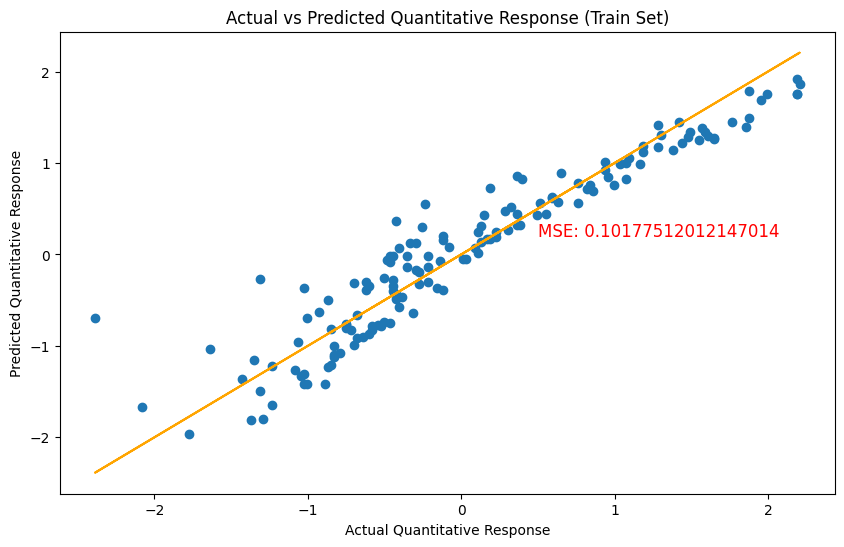

In [424]:
y_hat_train = predict(x_train, weights_train[-1])

# Plot the quantitative response of y
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_hat_train)
plt.title('Actual vs Predicted Quantitative Response (Train Set)')
plt.xlabel('Actual Quantitative Response')
plt.ylabel('Predicted Quantitative Response')
# MSE
plt.text(0.5, 0.20, f"MSE: {mean_squared_error(y_train, y_hat_train)}", color='red', fontsize=12)
# Best Fit Line
plt.plot(y_train, y_train, color='orange')
plt.show()

<h1>7.) Predicting and Evaluating the Quantitative Response y on the test set</h1>

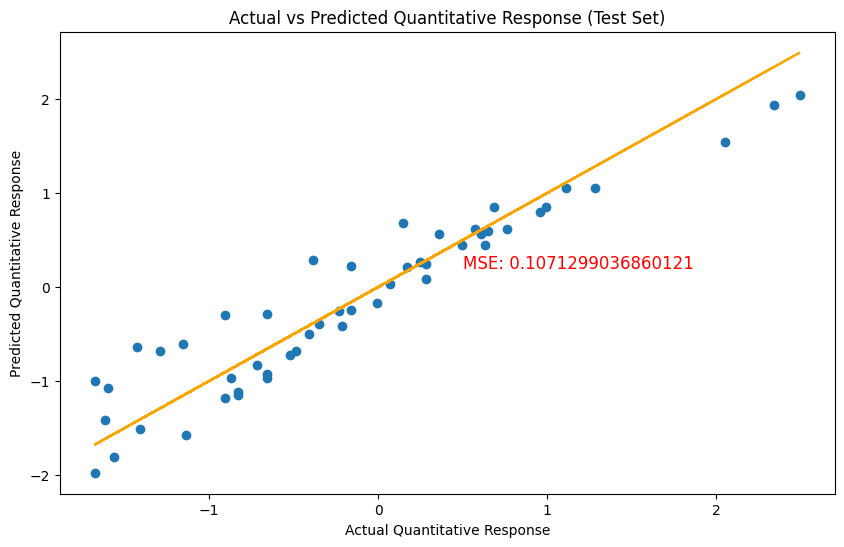

In [425]:
y_hat_test = predict(x_test, weights_train[-1])

# Plot the quantitative response of y
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_hat_test)
plt.title('Actual vs Predicted Quantitative Response (Test Set)')
plt.xlabel('Actual Quantitative Response')
plt.ylabel('Predicted Quantitative Response')
# MSE
plt.text(0.5, 0.20, f"MSE: {mean_squared_error(y_test, y_hat_test)}", color='red', fontsize=12)
# Best Fit Line
plt.plot(y_test, y_test, color='orange')
plt.show()

<h1>8.) Reverting Standardized Data into its original form

In [426]:
df_standard_revert = df_standard

df_standard_revert['Predicted Sales'] = predict(df_standard_revert[['bias', 'TV', 'Radio', 'Newspaper']], weights_train[-1])
df_standard_revert['TV'] = df_standard_revert['TV'] * df['TV'].std() + df['TV'].mean()
df_standard_revert['Radio'] = df_standard_revert['Radio'] * df['Radio'].std() + df['Radio'].mean()
df_standard_revert['Newspaper'] = df_standard_revert['Newspaper'] * df['Newspaper'].std() + df['Newspaper'].mean()
df_standard_revert['Sales'] = df_standard_revert['Sales'] * df['Sales'].std() + df['Sales'].mean()
df_standard_revert['Predicted Sales'] = df_standard_revert['Predicted Sales'] * df['Sales'].std() + df['Sales'].mean()
df_standard_revert['Residuals'] = df_standard_revert['Sales'] - df_standard_revert['Predicted Sales']
df_standard_revert.drop('bias', axis=1, inplace=True)

df_standard_revert

,TV,Radio,Newspaper,Sales,Predicted Sales,Residuals
0,230.308426,37.836477,69.296979,22.120270,20.555594,1.564676
1,44.242678,39.340241,45.136502,10.390910,12.407745,-2.016835
2,16.874171,45.956803,69.397230,9.288149,12.457861,-3.169712
3,151.511186,41.345260,58.570128,18.511236,17.636956,0.874280
4,180.884712,10.768723,58.469877,12.897183,13.283930,-0.386747
...,...,...,...,...,...,...
195,37.926869,3.650906,13.757957,7.583883,5.430385,2.153498
196,94.067396,4.853917,8.043654,9.689153,8.167425,1.521728
197,177.075176,9.264959,6.339388,12.796932,12.717816,0.079116
198,283.942679,42.047016,66.289451,25.528802,23.744013,1.784789


<h1>9.) Observing and Analyzing the Cost Results</h1>

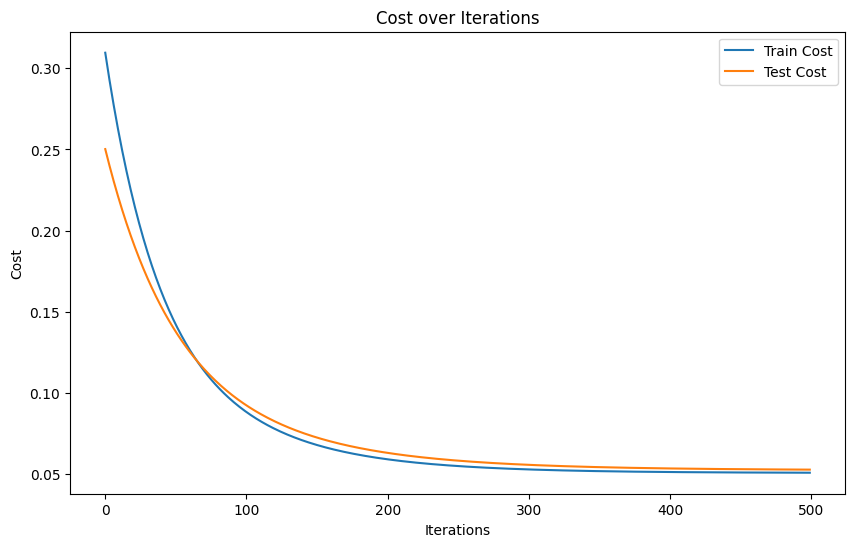

In [427]:
plt.figure(figsize=(10, 6))
plt.plot(cost_train, label='Train Cost')
plt.plot(cost_test, label='Test Cost')
plt.title('Cost over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

<h1> Questions </h1>

In [428]:
#setting up alpha, weights, and interations as stated in the guide
q_alpha = 0.01
q_iterations = 500
q0_weights = initializing_weights(False)
q0_weights

array([0., 0., 0., 0.])

<h2>1.)</h2>

In [429]:
weights_train, cost_train = grad_descent(x_train, y_train, q0_weights, q_alpha, q_iterations)

print("Optimal Weights: ",weights_train[-1])
print("hΘ(x) = ",weights_train[-1][0]," + ",weights_train[-1][1]," = TV + ",weights_train[-1][2]," = Radio + ",weights_train[-1][3]," = Newspaper")


Optimal Weights:  [0.0008611  0.73612193 0.53202897 0.00563131]
hΘ(x) =  0.0008611010185098368  +  0.7361219268768828  = TV +  0.5320289655093088  = Radio +  0.005631310861037051  = Newspaper


<p1> The order of biggest impact on sales from largest to smallers is TV, Radio, Newspaper</p1>

<h2>2.)</h2>

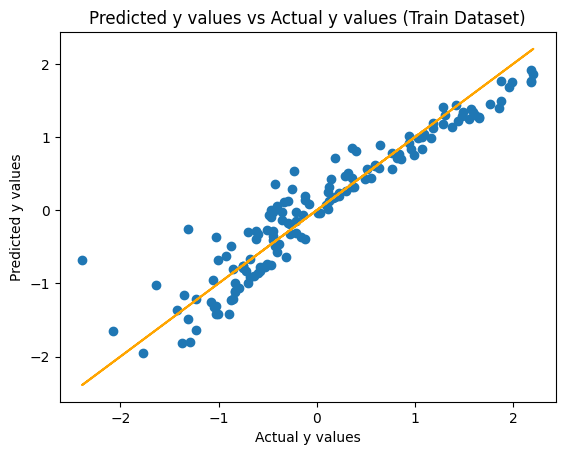

In [430]:
predicted_train = predict(x_train, weights_train[-1])
plt.scatter(y_train, predicted_train)
plt.title('Predicted y values vs Actual y values (Train Dataset)')
plt.xlabel('Actual y values')
plt.ylabel('Predicted y values')
plt.plot(y_train, y_train, color='orange')
plt.show()

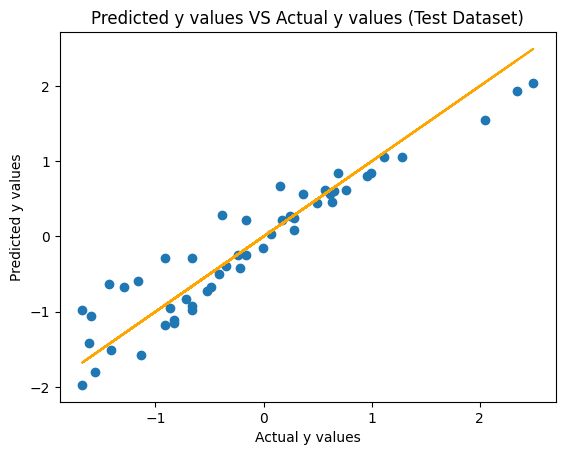

In [431]:
predicted_test = predict(x_test, weights_train[-1])
plt.scatter(y_test, predicted_test)
plt.xlabel('Actual y values')
plt.ylabel('Predicted y values')
plt.title('Predicted y values VS Actual y values (Test Dataset)')
plt.plot(y_test, y_test, color='orange')
plt.show()

In [432]:
print(f"The r2 score for train is {r2_score(y_train, predicted_train)}")
print(f"The r2 score for test is {r2_score(y_test, predicted_test)}")

The r2 score for train is 0.896599665318039
The r2 score for test is 0.8946825932703439


<p1> We can see that the trend is both uphward for train and test sets. </p1>

<h2>3.)</h2>

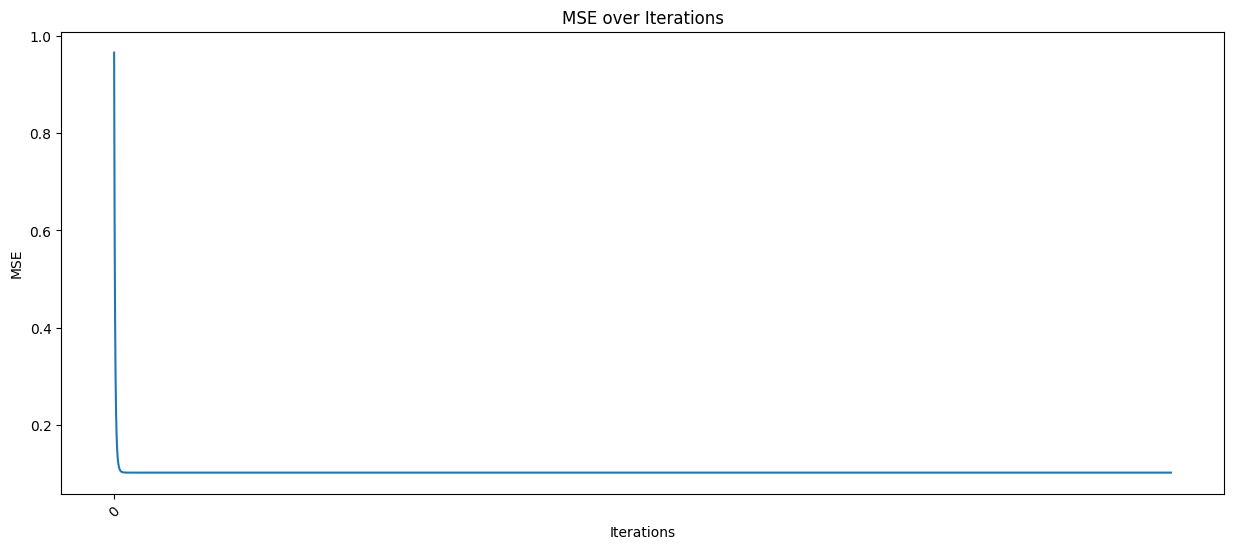

In [433]:
increased_iterations = 50000
weights_train, cost_train = grad_descent(x_train, y_train, q0_weights, q_alpha, increased_iterations)

MSE_array = []
for j in range(increased_iterations):
    MSE = mean_squared_error(y_train, predict(x_train, weights_train[j]))
    MSE_array.append(MSE)

plt.figure(figsize=(15,6))
plt.plot(MSE_array)
plt.title('MSE over Iterations')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.xticks(np.arange(0, q_iterations, 1000), rotation = 45)
plt.show()

In [434]:
r2_array = []
for i in range(increased_iterations):
    r2 = r2_score(y_train, predict(x_train, weights_train[i]))
    r2_array.append(r2)

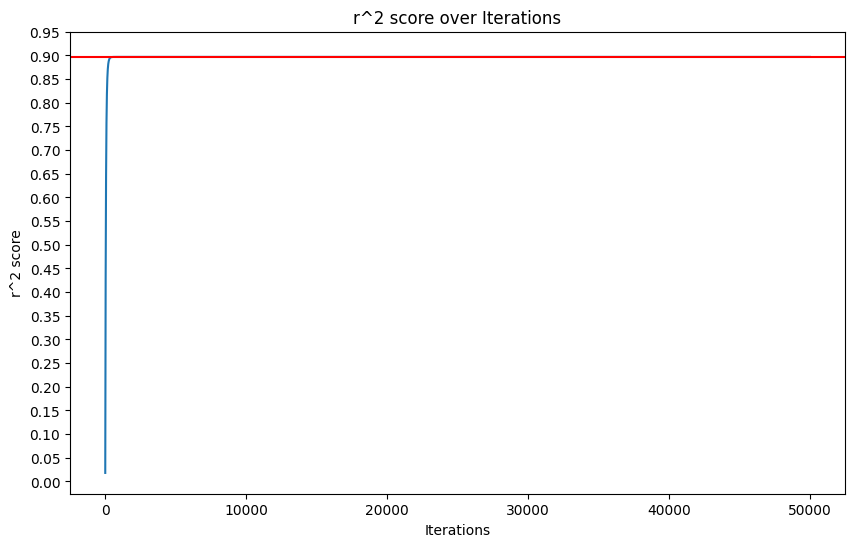

Maximum r^2 score: 0.8968197996765748


In [435]:
plt.figure(figsize=(10, 6))
plt.plot(r2_array)
plt.title('r^2 score over Iterations')
plt.xlabel('Iterations')
plt.ylabel('r^2 score')
plt.yticks(np.arange(0, 1, 0.05))
plt.axhline(y=max(r2_array), color='r', linestyle='-')
plt.show()
print(f"Maximum r^2 score: {max(r2_array)}")

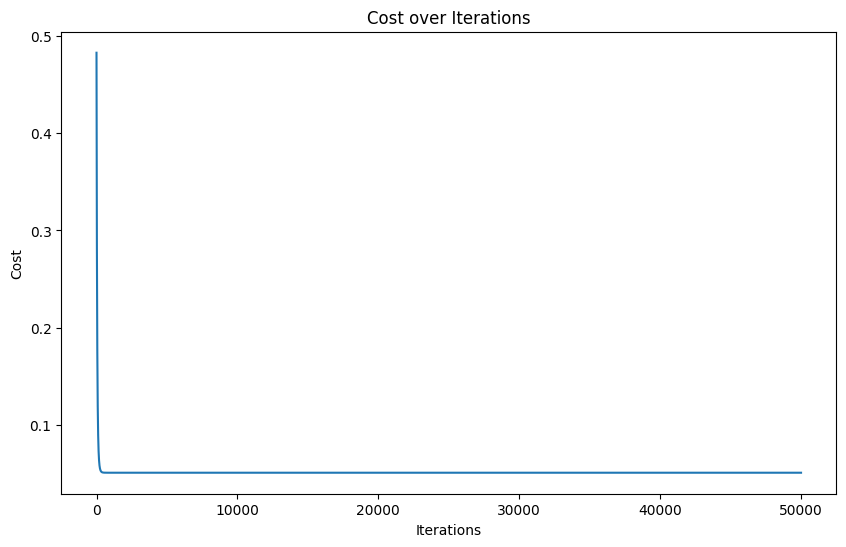

In [436]:
plot_costs(cost_train)

<h2>4.)</h2>

In [437]:
def opt_iterations(max_r2, r2_array):
    for i in range(len(r2_array)):
        if r2_array[i] == max_r2:
            return i

optimal_iteration = opt_iterations(max(r2_array), r2_array)
print(f"Optimal number of iterations: {optimal_iteration}")

Optimal number of iterations: 2741


In [438]:
four_w = initializing_weights(True)
iterations = increased_iterations
   
learning_rates = [0.2, 0.1, 0.01, 0.001, 0.0001, 0.00001]

cost = {i:0 for i in learning_rates}
error = {i:0 for i in learning_rates}
cost_history = {i:[] for i in learning_rates}

for j in learning_rates:
    weights_train, cost_train = grad_descent(x_train, y_train, four_w, j, iterations)

    cost[j] = cost_train[-1]
    from sklearn.metrics import mean_squared_error
    error[j] = mean_squared_error(y_train, predict(x_train, weights_train[-1]))
    cost_history[j] = cost_train

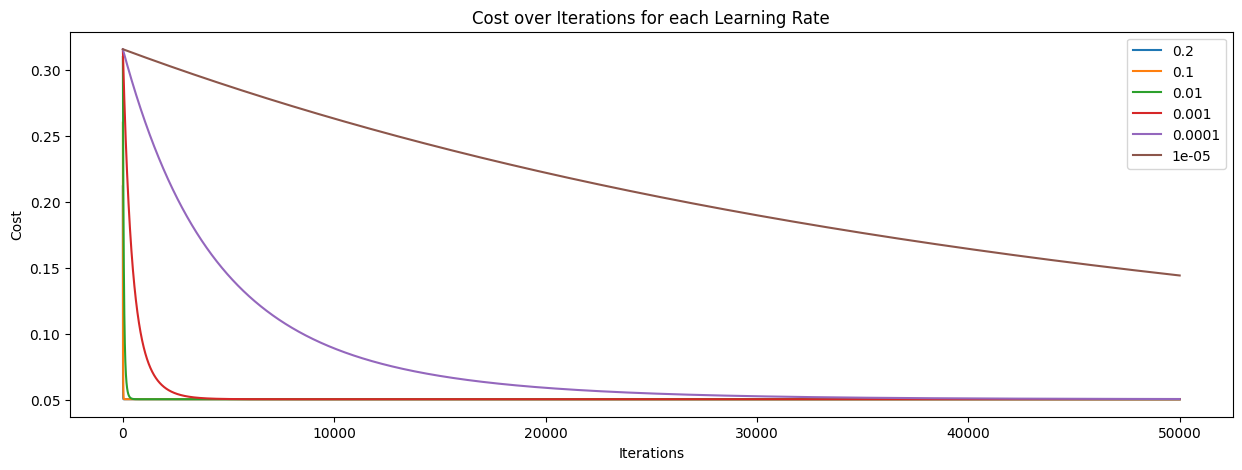

In [439]:
plt.figure(figsize=(15, 5))
for j in learning_rates:
    plt.plot(cost_history[j], label=j)
plt.title('Cost over Iterations for each Learning Rate')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [440]:
def grad_descent_optimized(x, y, weights, alpha, iterations, diff_threshold):
    weights_array = []
    cost_array = []
    last = 0

    for j in range(iterations):
        weights = updated_weights(x, y, weights, alpha)
        weights_array.append(weights)
        cost = compute_cost(x, y, weights)
        cost_array.append(cost)

        if j > 0 and abs(cost_array[j] - cost_array[j-1]) < diff_threshold:
            last = j
            break
        last = j
    
    return weights_array, cost_array, last

In [441]:
five_w = initializing_weights(True)
iterations = optimal_iteration
learning_rates = [0.2, 0.1, 0.01, 0.001, 0.0001, 0.00001]

diff_threshold = 1.0e-15
cost = {i:0 for i in learning_rates}
error = {i:0 for i in learning_rates}
cost_history = {i:[] for i in learning_rates}
optimal_iterations = {i:0 for i in learning_rates}

for j in learning_rates:
    weights_train, cost_train, opt_iteration = grad_descent_optimized(x_train, y_train, five_w, j, iterations, diff_threshold)

    cost[j] = cost_train[-1]
    from sklearn.metrics import mean_squared_error
    error[j] = mean_squared_error(y_train, predict(x_train, weights_train[-1]))
    cost_history[j] = cost_train
    optimal_iterations[j] = opt_iteration

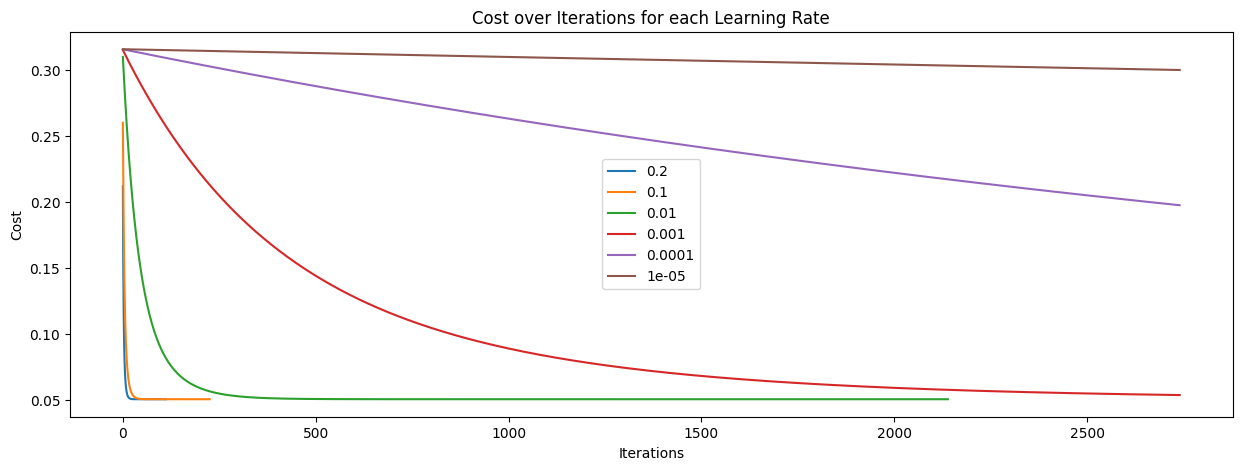

In [442]:
plt.figure(figsize=(15, 5))
for j in learning_rates:
    plt.plot(cost_history[j], label=j)
plt.title('Cost over Iterations for each Learning Rate')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

<h2>5.)</h2>
<p>The relationship between the learning rate and the number of iterations is that when the learning rate increases, the number of iterations decreases and vice versa.</p>

<h2>6.)</h2>

In [443]:
# Use Oridinary Least Squares from sklearn
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(x_train, y_train).coef_

# Get the r^2 score for the OLS and the gradient descent
r2_OLS = r2_score(y_train, ols.predict(x_train))
r2_GDA = r2_array[-1]

print(f"r^2 score (OLS): {r2_OLS}")
print(f"r^2 score (GDA): {r2_GDA}")

r^2 score (OLS): 0.8968197996765748
r^2 score (GDA): 0.8968197996765748
